## Example of visualizing NetCDF Data

In [42]:
os.environ['PROJ_LIB'] = '/home/jlreid/anaconda3/share/proj'

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.dates as mdates
from netCDF4 import Dataset, num2date
from numpy import meshgrid

### Enable Matplotlib Visualization

In [7]:
%matplotlib inline

### Read in NetCDF File Into Dataset netCDF4 Object

In [129]:
dataset = Dataset('ncei_training_vis/data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202002_c20200308T133325.nc', 'r')

### Extract Lat and Lon Values as netCDF4 Variable Objects

In [130]:
lats = dataset.variables['lat']
lons = dataset.variables['lon']

### Render Raster Plot Using Basemap and NumPy ndarray Representation of Day 0 Temp Anomaly

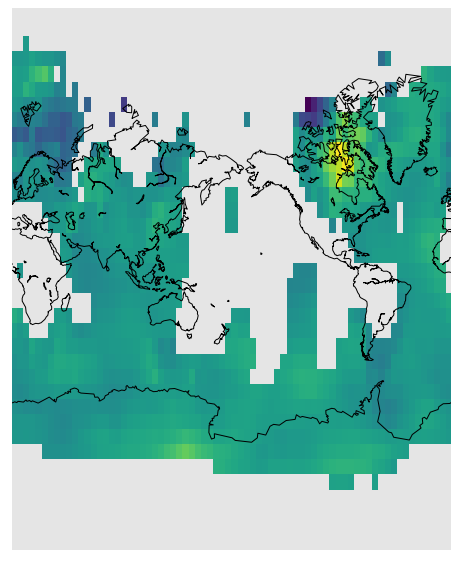

In [131]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='merc', llcrnrlon=lons[0], llcrnrlat=lats[0], urcrnrlon=lons[len(lons)-1], urcrnrlat=lats[len(lats)-1])
m.drawcoastlines()
m.imshow(dataset.variables['anom'][0,0,:,:]);

In [133]:
dataset.variables['anom'].shape

(1682, 1, 36, 72)

### Extract 9 Days Worth of Temp Anomaly Data Using NumPy Slicing

In [147]:
multi_month = dataset.variables['anom'][0:9,0,:,:]

### Compute Avg Temp Anomaly Over 9 Days

In [148]:
avgs = []
for temp_grid in multi_month:
    avgs.append(temp_grid.mean())

### Plot Avg Temp Over Time And Convert Date Strings Based off Aaron Sweeney's Suggestions

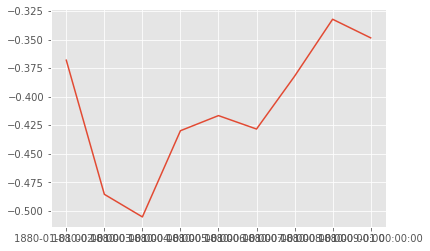

In [164]:
raw_times = dataset.variables['time']
times_pyts = num2date(raw_times[:], units=raw_times.units)
plt.plot_date(times_pyts, avgs, xdate=True);